<a href="https://colab.research.google.com/github/rlmariz/reconhecimentos-padroes/blob/main/ReconhecimentoPadr%C3%B5es_Lista01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

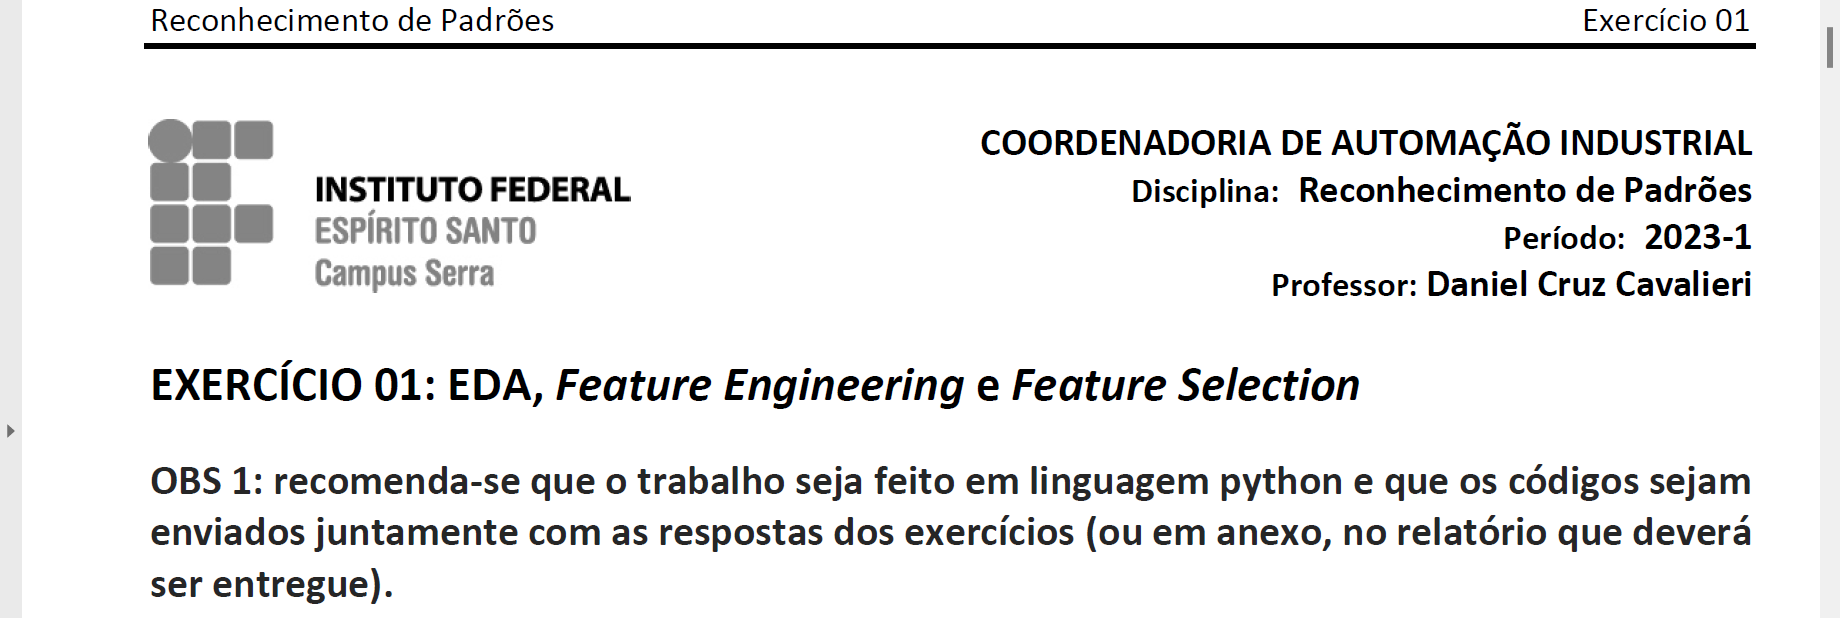



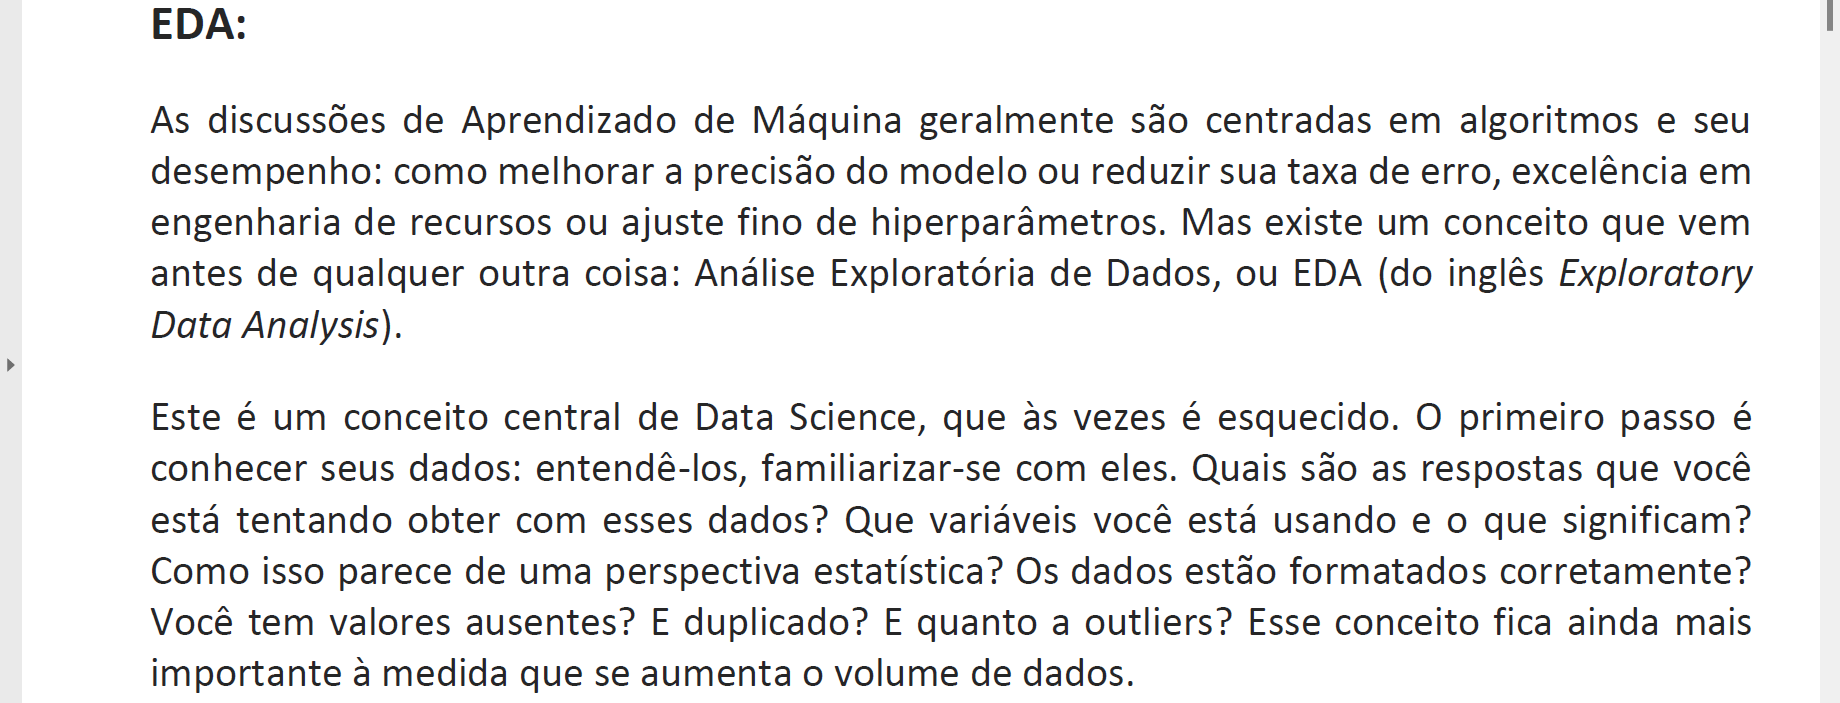

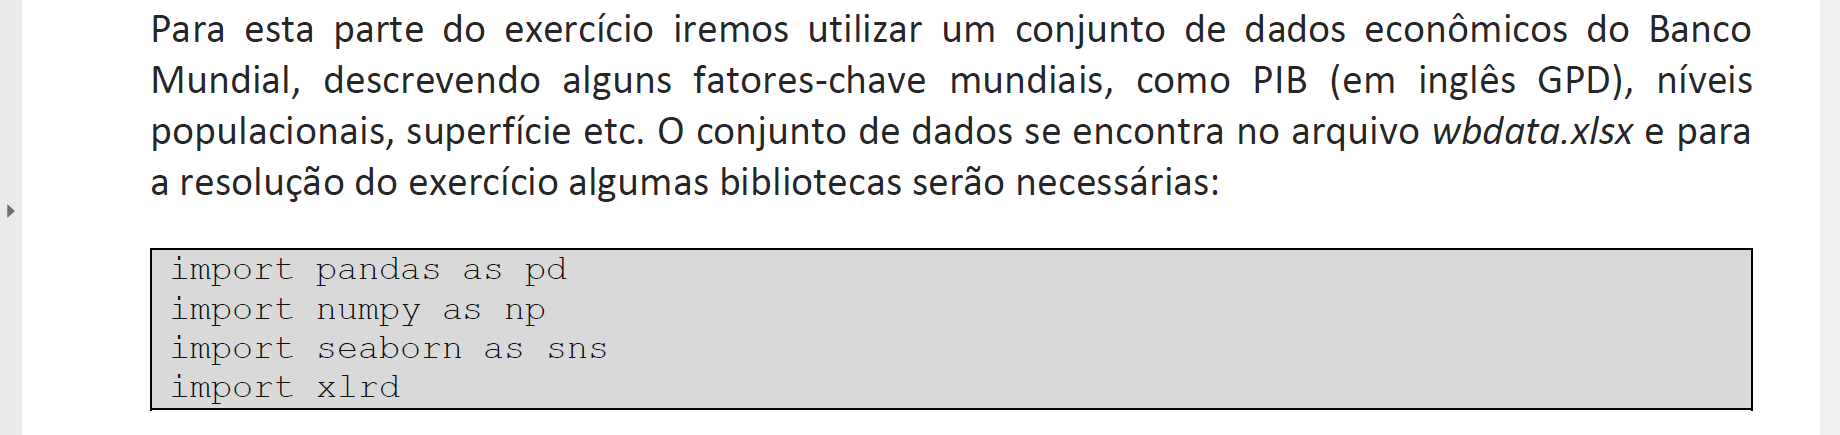

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from imblearn.under_sampling import RandomUnderSampler

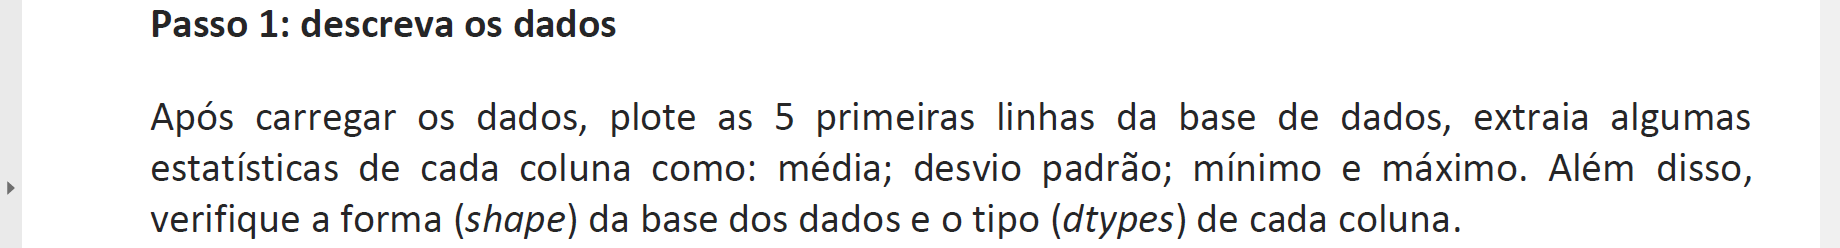

In [ ]:
# cleveland.csv
wb = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-01/wbdata.xlsx')

In [ ]:
wb.head(5)

,country,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
0,Afghanistan,37.2,652.9,57.0,20.3,550.00,73.0,1.96,1.0,-1.4
1,Albania,2.9,28.8,105.0,13.9,4.86,38.2,13.32,4.0,4.3
2,Algeria,42.2,2381.7,18.0,171.6,4.06,648.2,15.35,2.1,0.1
3,American Samoa,0.1,0.2,277.0,NaN,NaN,NaN,NaN,-5.4,-5.2
4,Andorra,0.1,0.5,164.0,NaN,NaN,NaN,NaN,1.6,1.6


In [ ]:
wb.describe()

,population,surface,population.dens,national.income,national.income.cap,purchasing.power,purchasing.power.cap,gdp,gdp.cap
count,214.000000,213.000000,212.000000,192.000000,192.000000,192.000000,192.000000,203.000000,203.000000
mean,35.362150,619.727230,140.310792,432.073958,96.600521,692.918229,34.363958,3.122167,1.824631
std,137.574451,1841.907686,162.206065,1850.957315,219.982037,2557.432311,104.031204,3.126563,3.100987
min,0.000000,0.000000,0.000000,0.100000,1.010000,0.100000,1.030000,-11.200000,-12.100000
25%,0.825000,11.000000,28.750000,8.400000,3.847500,20.475000,5.622500,1.500000,0.500000
50%,6.750000,93.000000,82.000000,35.400000,9.465000,74.350000,14.195000,3.000000,1.800000
75%,25.075000,447.400000,202.750000,211.475000,41.027500,356.175000,31.205000,4.850000,3.700000
max,1392.700000,17098.300000,861.000000,20562.600000,960.000000,25266.100000,900.000000,25.100000,24.300000


In [ ]:
wb.shape

(215, 10)

In [ ]:
wb.dtypes

country                  object
population              float64
surface                 float64
population.dens         float64
national.income         float64
national.income.cap     float64
purchasing.power        float64
purchasing.power.cap    float64
gdp                     float64
gdp.cap                 float64
dtype: object

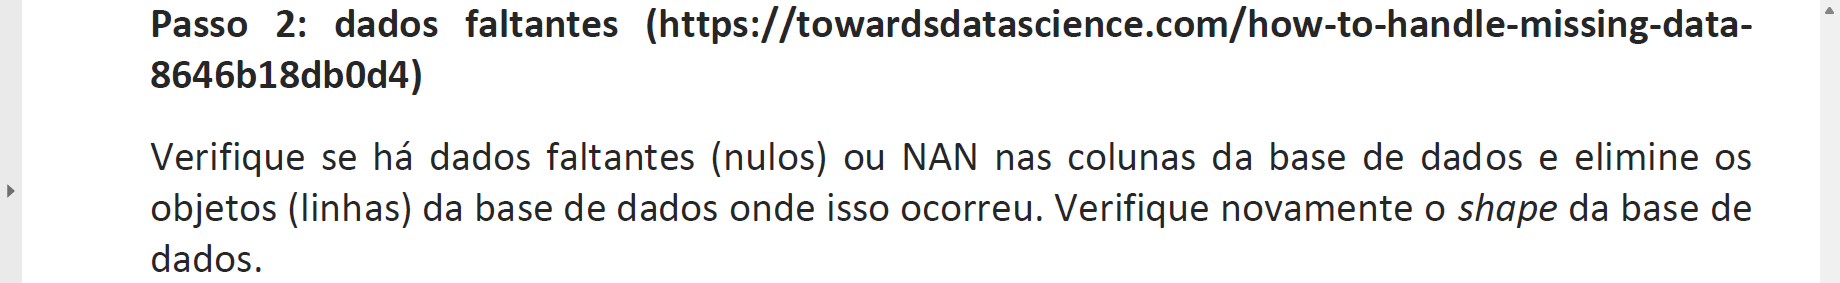

In [ ]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               215 non-null    object 
 1   population            214 non-null    float64
 2   surface               213 non-null    float64
 3   population.dens       212 non-null    float64
 4   national.income       192 non-null    float64
 5   national.income.cap   192 non-null    float64
 6   purchasing.power      192 non-null    float64
 7   purchasing.power.cap  192 non-null    float64
 8   gdp                   203 non-null    float64
 9   gdp.cap               203 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.9+ KB


In [ ]:
wb.isnull().values.any()

True

In [ ]:
wb.isnull().sum().sum()

122

In [ ]:
wb.isnull().sum()

country                  0
population               1
surface                  2
population.dens          3
national.income         23
national.income.cap     23
purchasing.power        23
purchasing.power.cap    23
gdp                     12
gdp.cap                 12
dtype: int64

In [ ]:
wb.replace([np.inf, -np.inf], np.nan)
wb.dropna(how='any', axis=0, inplace=True)

In [ ]:
wb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 214
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               188 non-null    object 
 1   population            188 non-null    float64
 2   surface               188 non-null    float64
 3   population.dens       188 non-null    float64
 4   national.income       188 non-null    float64
 5   national.income.cap   188 non-null    float64
 6   purchasing.power      188 non-null    float64
 7   purchasing.power.cap  188 non-null    float64
 8   gdp                   188 non-null    float64
 9   gdp.cap               188 non-null    float64
dtypes: float64(9), object(1)
memory usage: 16.2+ KB


In [ ]:
wb.shape

(188, 10)

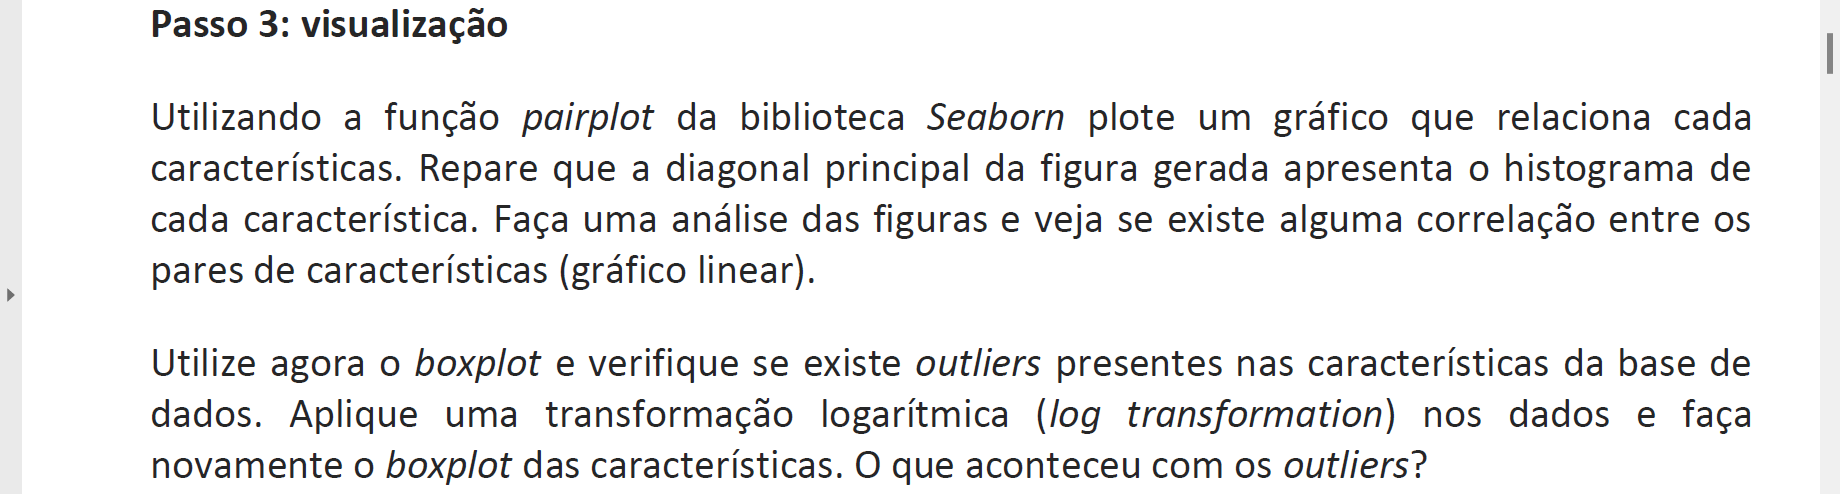

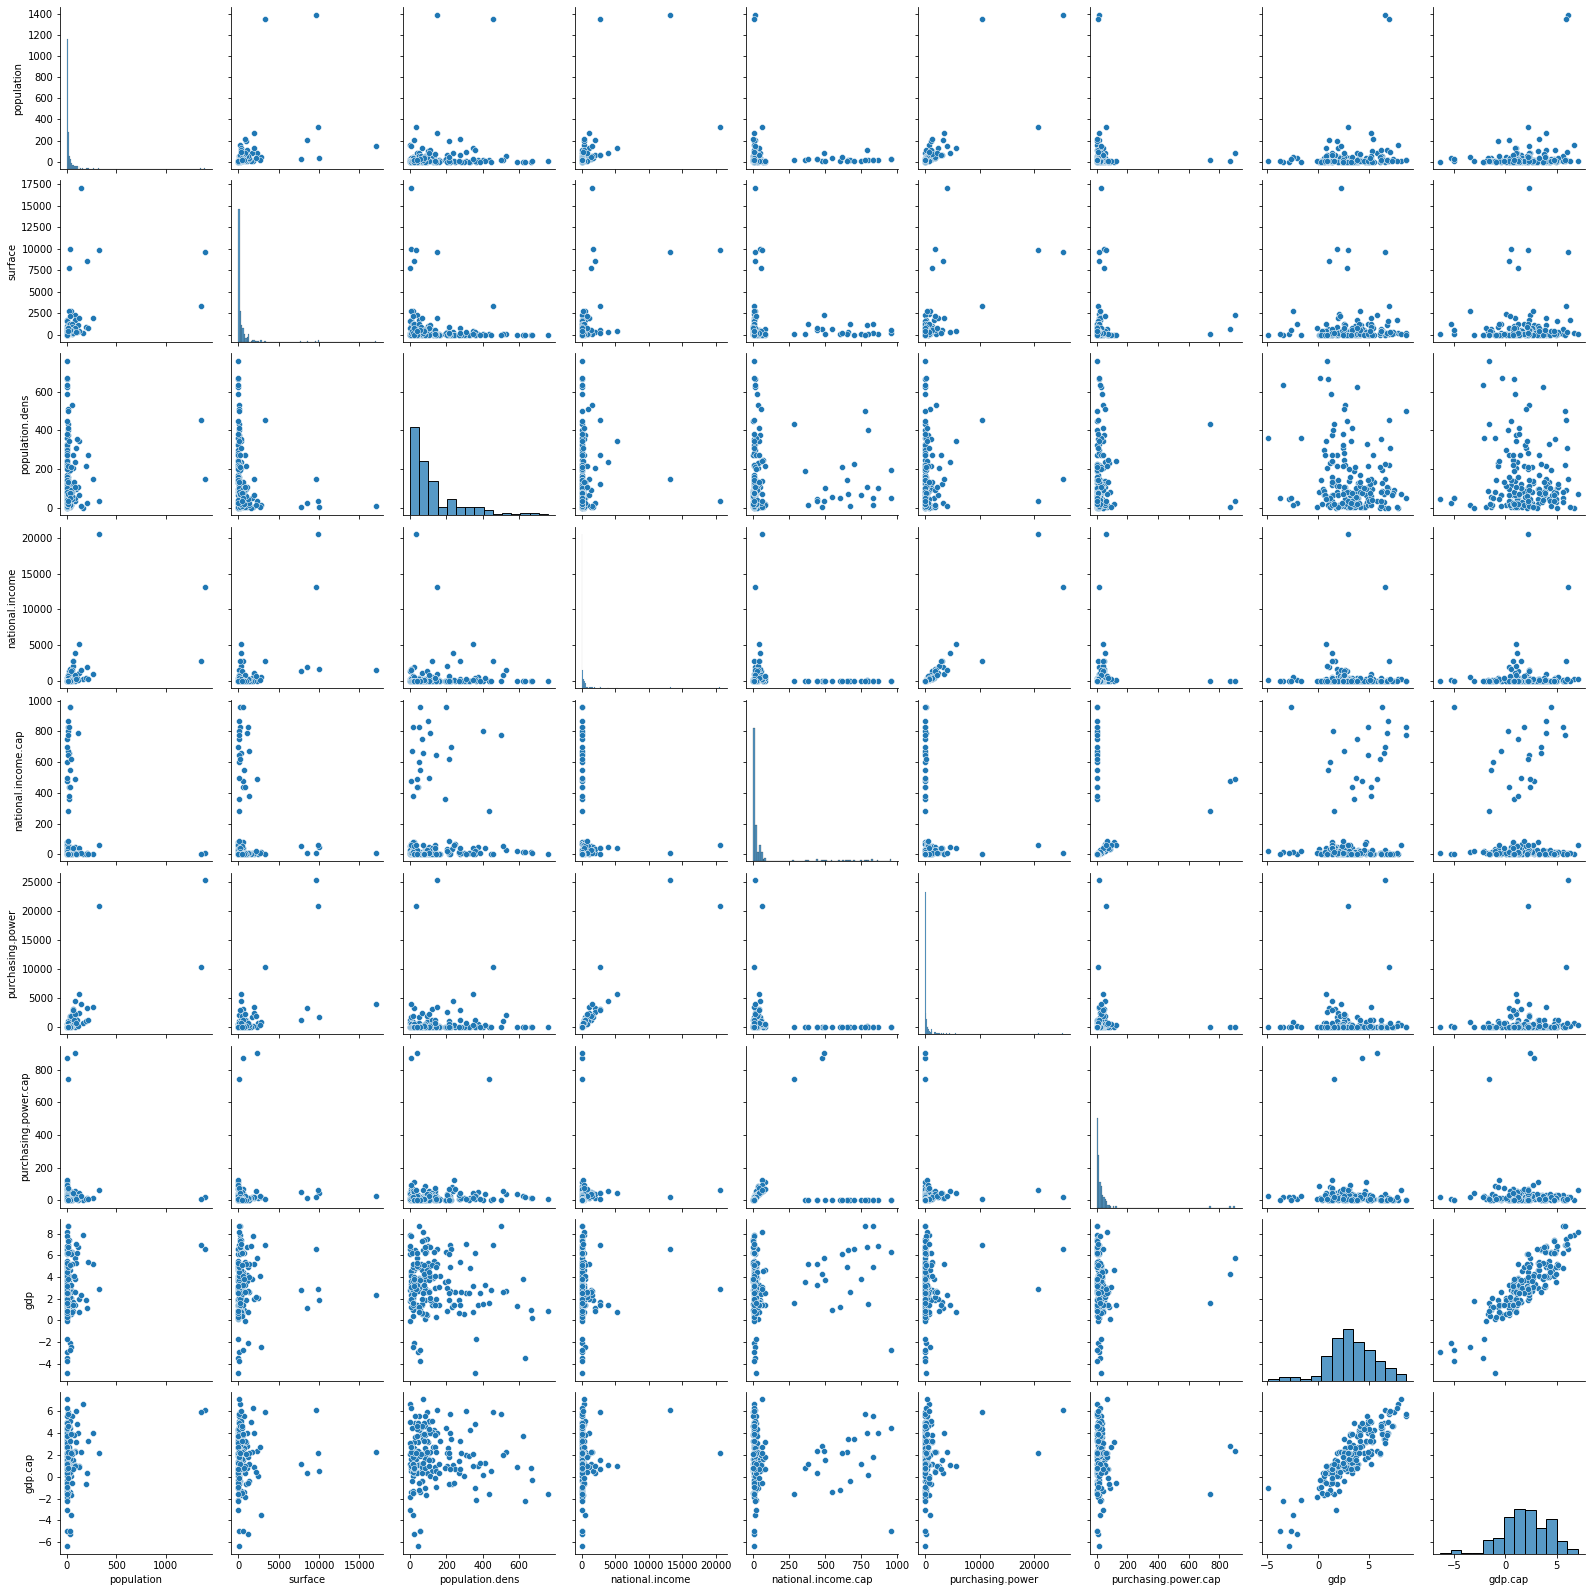

In [ ]:
sns.pairplot(wb)

**Analisando os dados verifica se que tem uma correção entre as features gdp e gdp.cap, provavelmente é a mesma informação em uma abordagem diferente.**


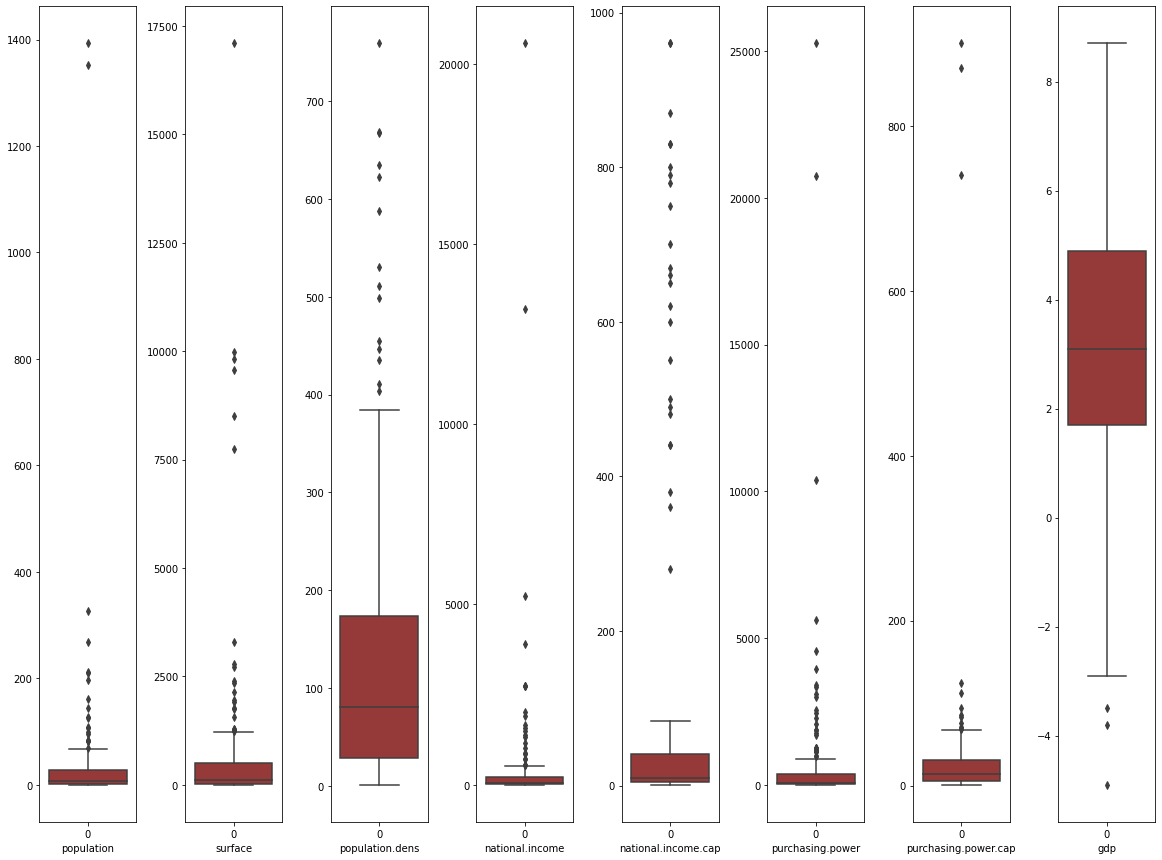

In [ ]:
fig, ax = plt.subplots(1, 8, figsize=(20, 15))

plt.subplots_adjust(wspace=0.5)

for i, graf in np.ndenumerate(ax):
  column = wb.columns[i[0]+1]
  sns.boxplot(data=wb[column], ax=ax[i[0]], color='brown',)
  ax[i[0]].set_xlabel(column)

plt.show()

/usr/local/lib/python3.9/dist-packages/pandas/core/internals/blocks.py:402: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


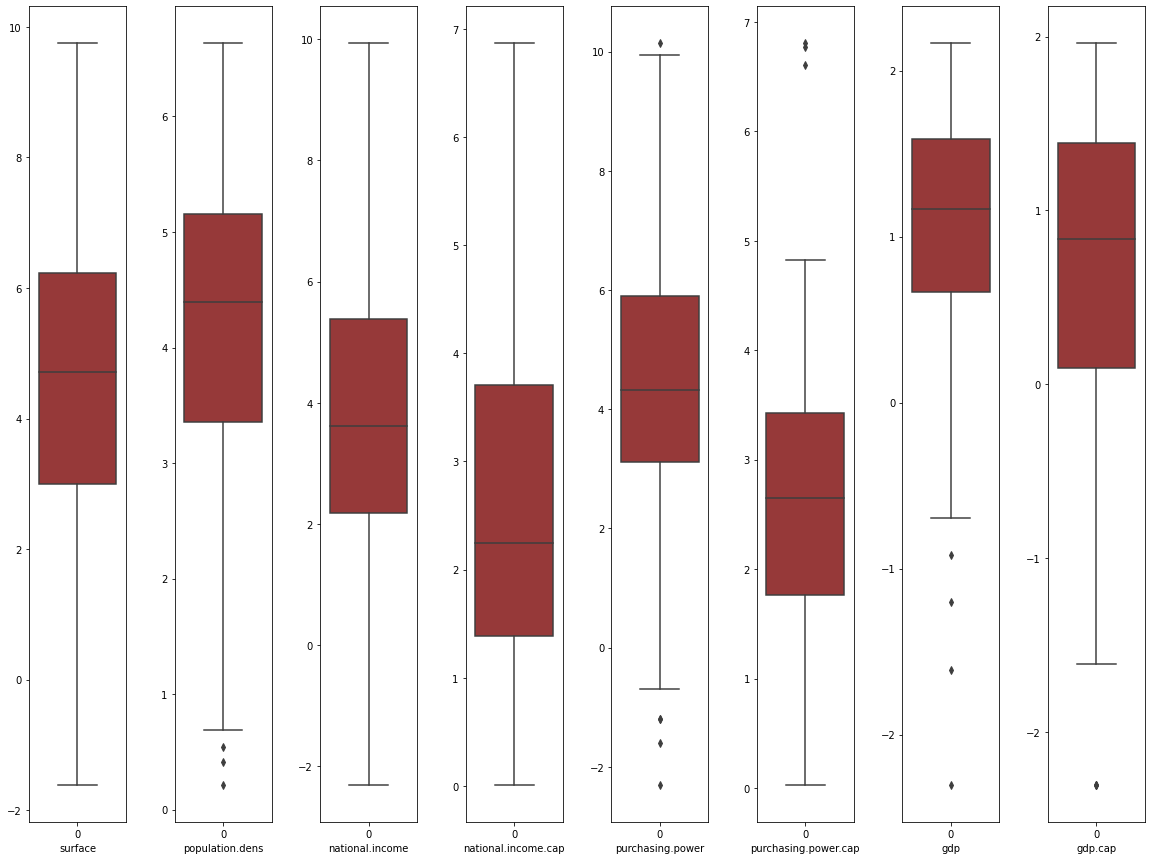

In [ ]:
np.seterr(divide = 'ignore')
wb_log = np.log(wb.drop(columns='country', axis=1))
np.seterr(divide = 'warn')

fig, ax = plt.subplots(1, 8, figsize=(20, 15))

plt.subplots_adjust(wspace=0.5)

for i, graf in np.ndenumerate(ax):
  column = wb_log.columns[i[0]+1]
  sns.boxplot(data=wb_log[column], ax=ax[i[0]], color='brown',)
  ax[i[0]].set_xlabel(column)

plt.show()

**O gráfico boxplot sem log transformation tem bastante outlier, já o mesmo gráfico após log transformation ficaram mais juntos reduzindo a quantidade de outliers em alguma features eliminou por completo.**

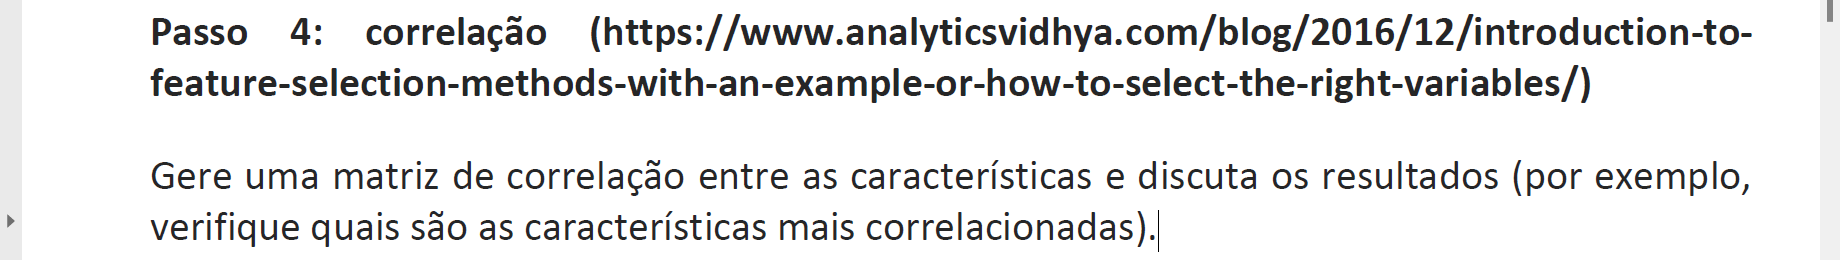

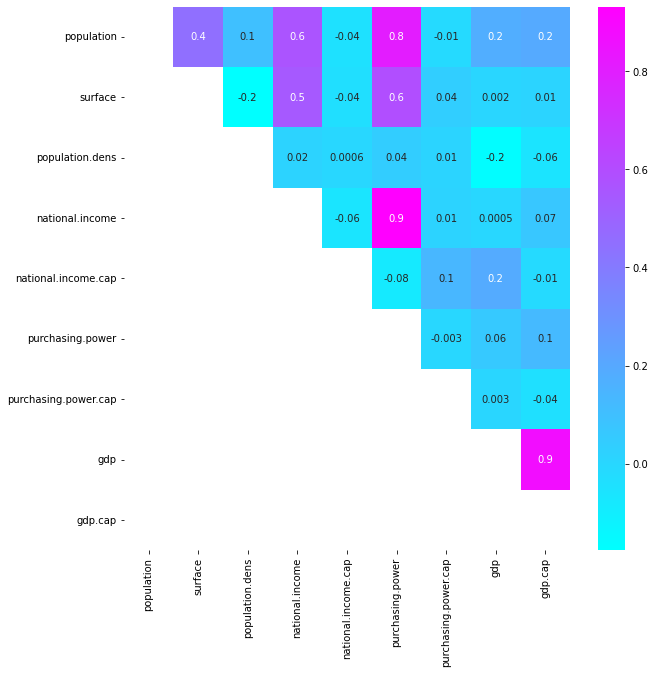

In [ ]:
wb_corr = wb.corr()
mask = np.tril(wb_corr)
sns.heatmap(wb_corr, fmt='.1g', annot = True, cmap= 'cool', mask=mask)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
a = wb_corr.abs().unstack().sort_values(ascending = False)
for i, v in a.items():
    if (i[0] != i[1]) and v > 0.7:
      print('index: ', i, 'value: ', v)

index:  ('purchasing.power', 'national.income') value:  0.9311276198048112
index:  ('national.income', 'purchasing.power') value:  0.9311276198048112
index:  ('gdp.cap', 'gdp') value:  0.8707508669904193
index:  ('gdp', 'gdp.cap') value:  0.8707508669904193
index:  ('purchasing.power', 'population') value:  0.8084747116917476
index:  ('population', 'purchasing.power') value:  0.8084747116917476


**Verificando a matriz de correção é possivél verificar que as maiores correlações são:**

**1.purchasing.power e national.income**\
**2.gdp.cap e gdp**\
**3.purchasing.power e population**


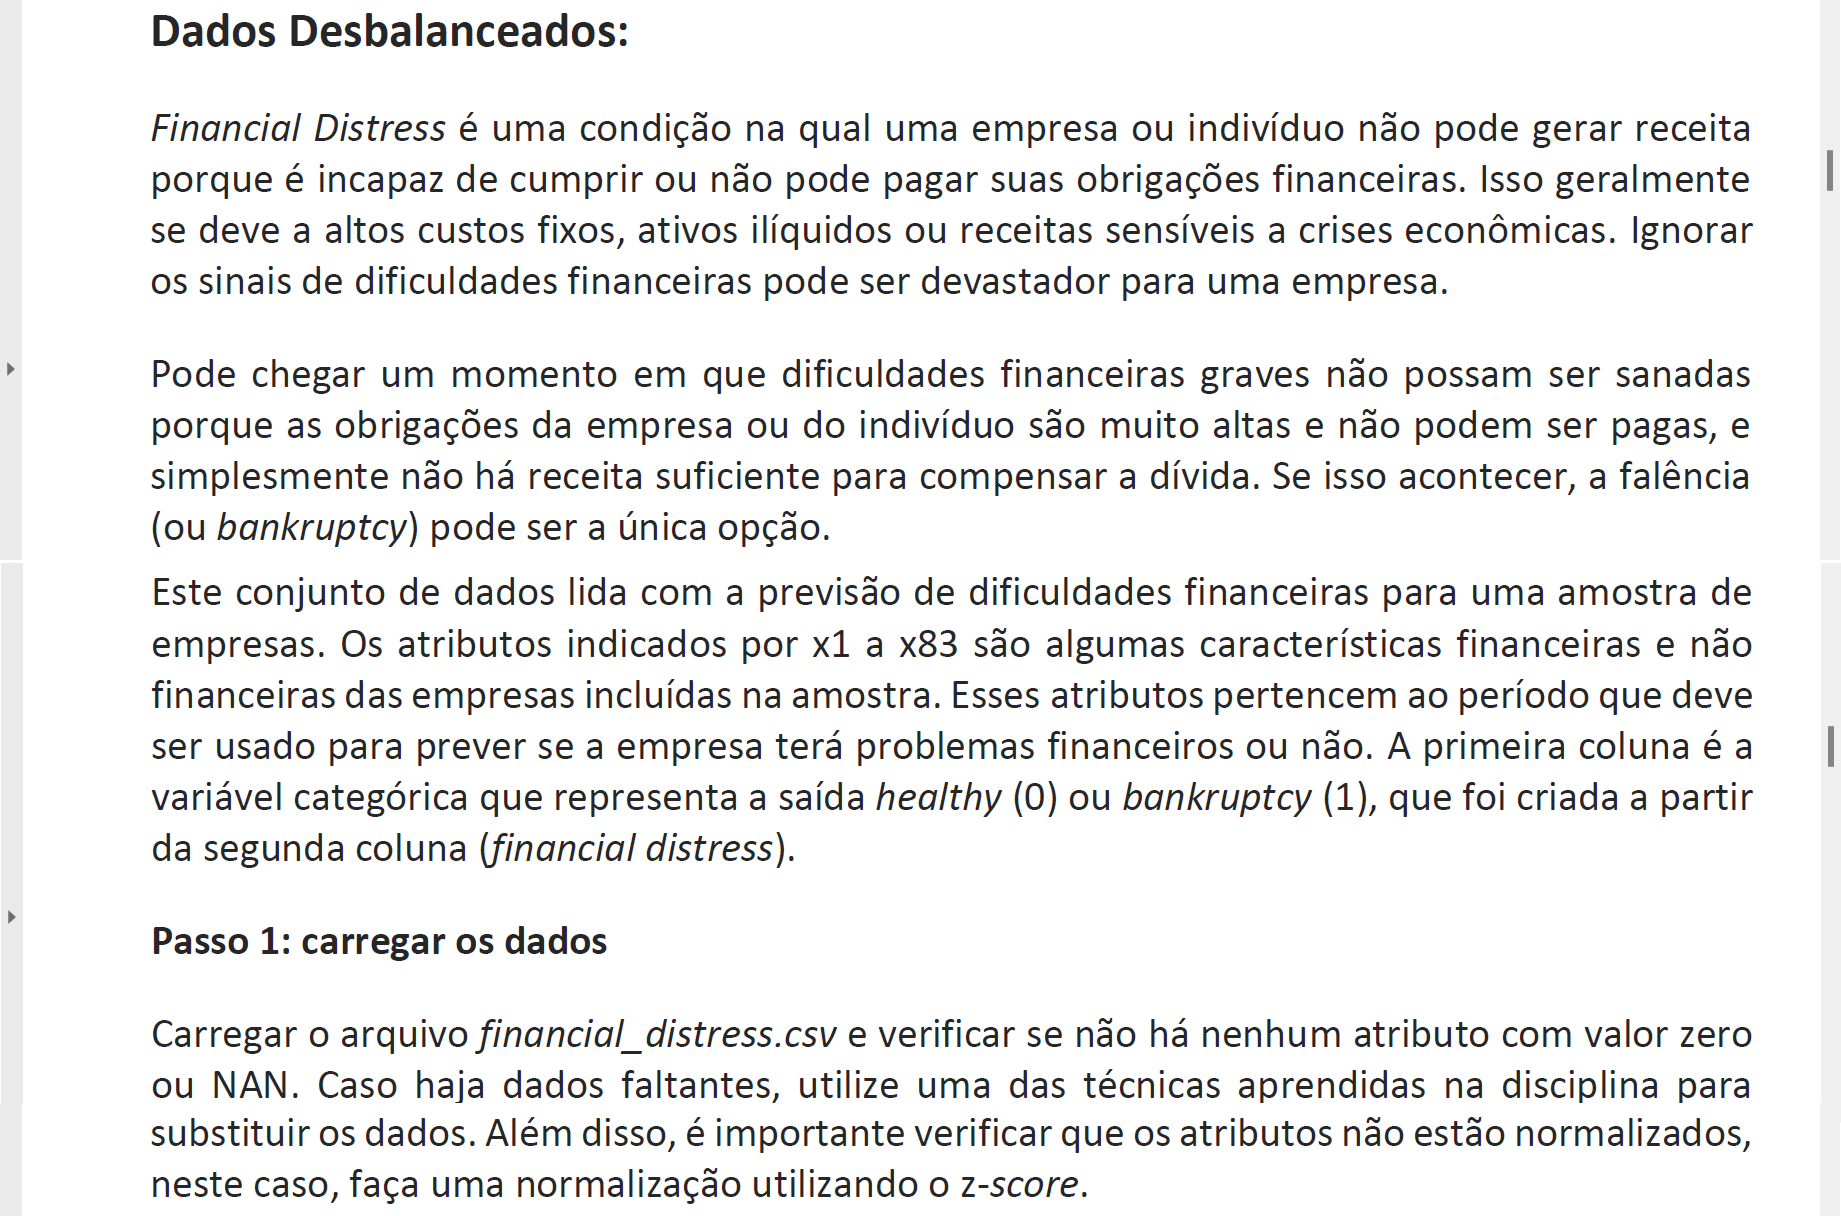

In [ ]:
# financial_distress.csv
fin = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-01/financial_distress.csv')
fin.head(5)

,Class,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,0,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,0,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,0,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,0,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27


In [ ]:
fin.shape

(3672, 85)

In [ ]:
fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3672 entries, 0 to 3671
Data columns (total 85 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Class               3672 non-null   int64  
 1   Financial Distress  3672 non-null   float64
 2   x1                  3672 non-null   float64
 3   x2                  3672 non-null   float64
 4   x3                  3672 non-null   float64
 5   x4                  3672 non-null   float64
 6   x5                  3672 non-null   float64
 7   x6                  3672 non-null   float64
 8   x7                  3672 non-null   float64
 9   x8                  3672 non-null   float64
 10  x9                  3672 non-null   float64
 11  x10                 3672 non-null   float64
 12  x11                 3672 non-null   float64
 13  x12                 3672 non-null   float64
 14  x13                 3672 non-null   float64
 15  x14                 3672 non-null   float64
 16  x15   

In [ ]:
fin.isnull().values.any()

False

In [ ]:
fin.isnull().sum().sum()

0

In [ ]:
for c in fin.columns[2:]:
  mean = fin[c].mean()
  fin[c].fillna(mean, inplace=True)
  fin[c].replace(0, mean, inplace=True)

In [ ]:
fin

,Class,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,0,0.010636,1.2810,0.022934,0.87454,1.21640,0.060940,0.188270,0.52510,0.018854,...,85.437,27.07,26.102,16.000,16.0,0.2,22,0.060390,30,49
1,0,-0.455970,1.2700,0.006454,0.82067,1.00490,-0.014080,0.181040,0.62288,0.006423,...,107.090,31.31,30.194,17.000,16.0,0.4,22,0.010636,31,50
2,0,-0.325390,1.0529,-0.059379,0.92242,0.72926,0.020476,0.044865,0.43292,-0.081423,...,120.870,36.07,35.273,17.000,15.0,-0.2,22,-0.455970,32,51
3,1,-0.566570,1.1131,-0.015229,0.85888,0.80974,0.076037,0.091033,0.67546,-0.018807,...,54.806,39.80,38.377,17.167,16.0,5.6,22,-0.325390,33,52
4,0,1.357300,1.0623,0.107020,0.81460,0.83593,0.199960,0.047800,0.74200,0.128030,...,85.437,27.07,26.102,16.000,16.0,0.2,29,1.251000,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,0,0.438020,2.2605,0.202890,0.16037,0.18588,0.175970,0.198400,2.22360,1.091500,...,100.000,100.00,100.000,17.125,14.5,-7.0,37,0.436380,4,41
3668,0,0.482410,1.9615,0.216440,0.20095,0.21642,0.203590,0.189870,1.93820,1.000100,...,91.500,130.50,132.400,20.000,14.5,-16.0,37,0.438020,5,42
3669,0,0.500770,1.7099,0.207970,0.26136,0.21399,0.193670,0.183890,1.68980,0.971860,...,87.100,175.90,178.100,20.000,14.5,-20.2,37,0.482410,6,43
3670,0,0.611030,1.5590,0.185450,0.30728,0.19307,0.172140,0.170680,1.53890,0.960570,...,92.900,203.20,204.500,22.000,22.0,6.4,37,0.500770,7,44


In [ ]:
fin.describe()

,Class,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
count,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3.672000e+03,3672.000000,3672.000000,3672.000000,3672.000000,...,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000,3672.000000
mean,0.037037,1.040257,1.387820,0.129706,0.615769,8.681599e-01,0.154949,0.106717,0.784031,39.274361,...,86.839822,91.920506,89.115908,17.780855,15.198708,-2.664305,19.714597,1.106782,13.122277,33.044935
std,0.188878,2.652227,1.452926,0.120013,0.177904,5.719519e-01,0.124904,0.210555,1.033606,4305.688039,...,16.706209,64.656504,64.349382,2.040152,2.828648,8.192663,7.508588,2.665426,9.465907,13.714563
min,0.000000,-8.631700,0.075170,-0.258080,0.016135,5.350000e-07,-0.269790,-0.627750,0.035160,-145000.000000,...,54.806000,24.318000,23.776000,15.250000,12.000000,-20.200000,1.000000,-0.499220,1.000000,2.000000
25%,0.000000,0.172275,0.952145,0.048701,0.501888,5.525575e-01,0.070001,-0.027754,0.436003,0.056185,...,79.951000,39.800000,38.377000,16.000000,13.000000,-7.000000,14.000000,0.200530,6.000000,21.000000
50%,0.000000,0.583805,1.183600,0.107530,0.638690,7.752450e-01,0.131830,0.104325,0.641875,0.135585,...,90.000000,66.120000,59.471000,17.000000,14.500000,0.200000,20.000000,0.611895,11.000000,34.000000
75%,0.000000,1.351750,1.506475,0.188685,0.749425,1.039000e+00,0.219570,0.231230,0.896772,0.273423,...,93.883000,130.500000,132.400000,20.000000,16.000000,2.100000,26.000000,1.355050,17.000000,44.000000
max,1.000000,128.400000,51.954000,0.749410,0.967900,6.835600e+00,0.858540,0.929550,38.836000,209000.000000,...,120.870000,227.500000,214.500000,22.000000,22.000000,8.600000,37.000000,128.400000,49.000000,74.000000


In [ ]:
from scipy.stats import zscore

fin_zscore = fin.copy()

for c in fin_zscore.columns[2:]:
  fin_zscore[c] = zscore(fin_zscore[c])

fin_zscore.head(5)

,Class,Financial Distress,x1,x2,x3,x4,x5,x6,x7,x8,...,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83
0,0,0.010636,-0.073530,-0.889790,1.454750,0.608946,-0.752754,0.387378,-0.250547,-0.009118,...,-0.083982,-1.003137,-0.979380,-0.873022,0.283316,0.349666,0.304413,-0.392633,1.783244,1.163525
1,0,-0.455970,-0.081102,-1.027125,1.151905,0.239109,-1.353457,0.353036,-0.155933,-0.009121,...,1.212300,-0.937551,-0.915781,-0.382796,0.283316,0.374081,0.304413,-0.411302,1.888901,1.236450
2,0,-0.325390,-0.230545,-1.575751,1.723920,-0.242885,-1.076758,-0.293797,-0.339742,-0.009142,...,2.037255,-0.863921,-0.836842,-0.382796,-0.070258,0.300835,0.304413,-0.586385,1.994557,1.309375
3,1,-0.566570,-0.189106,-1.207824,1.366713,-0.102155,-0.631868,-0.074498,-0.105055,-0.009127,...,-1.917741,-0.806224,-0.788598,-0.300928,0.283316,1.008882,0.304413,-0.537388,2.100214,1.382300
4,0,1.357300,-0.224075,-0.189054,1.117781,-0.056358,0.360413,-0.279855,-0.040670,-0.009093,...,-0.083982,-1.003137,-0.979380,-0.873022,0.283316,0.349666,1.236806,0.054114,-0.646859,-0.440828


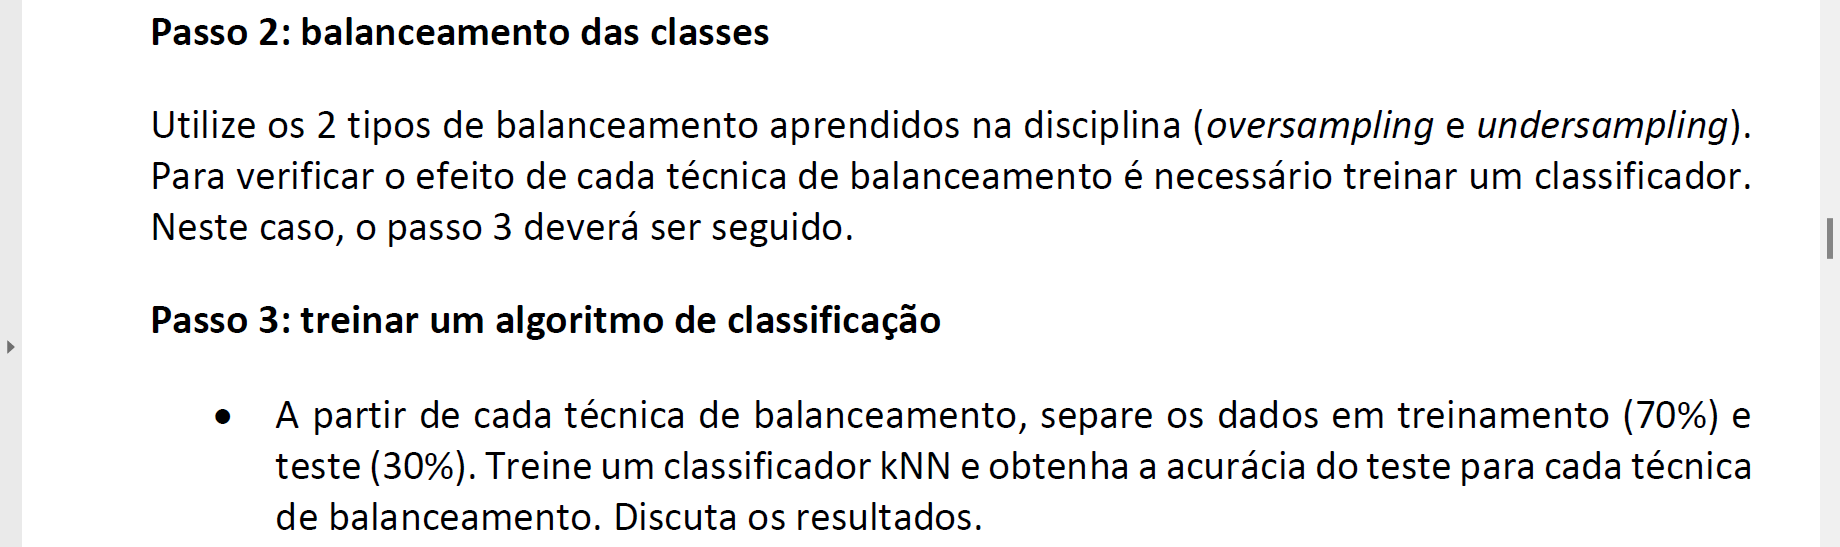

In [ ]:
X = fin_zscore.iloc[:,2:-1].values
y = fin_zscore.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
print(f"y: {sorted(Counter(y).items())}")
print(f"y_train: {sorted(Counter(y_train).items())}")
print(f"y_test: {sorted(Counter(y_test).items())}")

y: [(0, 3536), (1, 136)]
y_train: [(0, 2475), (1, 95)]
y_test: [(0, 1061), (1, 41)]


In [ ]:
#Oversampling Techniques

# Synthetic Minority Oversampling Technique(SMOTE)
X_ros_smote, y_ros_smote = SMOTE().fit_resample(X_train, y_train)
print(sorted(Counter(y_ros_smote).items()))

knn = KNeighborsClassifier()
knn.fit(X_ros_smote, y_ros_smote)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

[(0, 2475), (1, 2475)]
Acurácia no conjunto de teste: 0.8838


In [ ]:
#Undersampling Techniques

rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
print(sorted(Counter(y_rus).items()))

knn = KNeighborsClassifier()
knn.fit(X_rus, y_rus)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Acurácia no conjunto de teste: {acc:.4f}")

[(0, 95), (1, 95)]
Acurácia no conjunto de teste: 0.8167


**Após os testes utilizando as duas tecnologias Oversampling e Undersampling devido a caracteristicas dos dados que estão muito desbalanceados verifica se que utilizando o Oversampling a acuracia é melhor apesar da disferença não ser grande.**

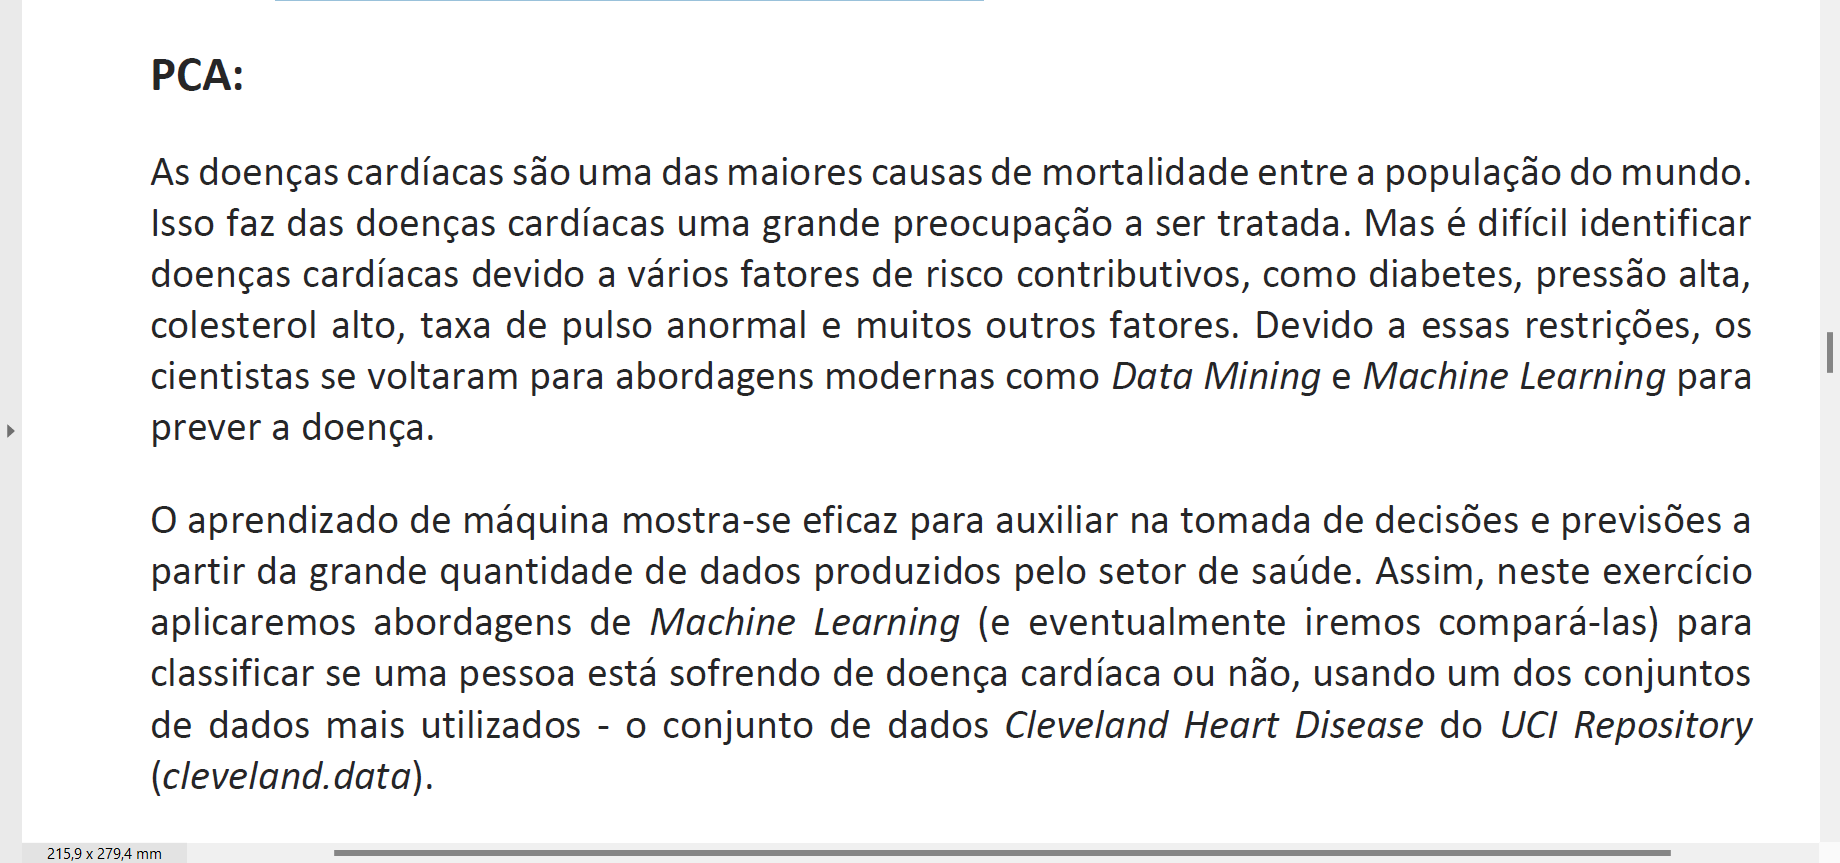

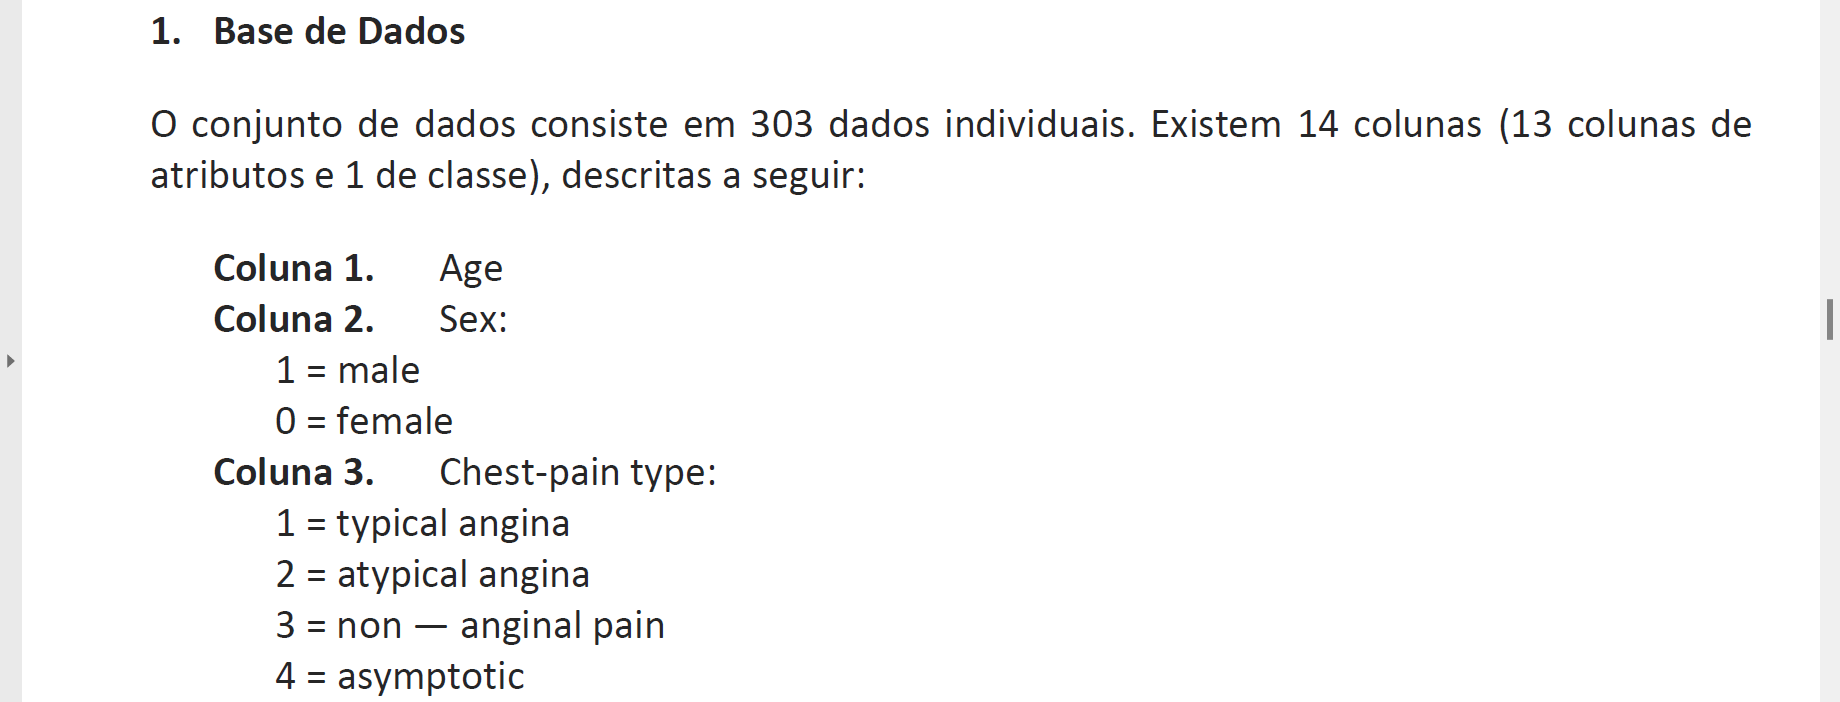

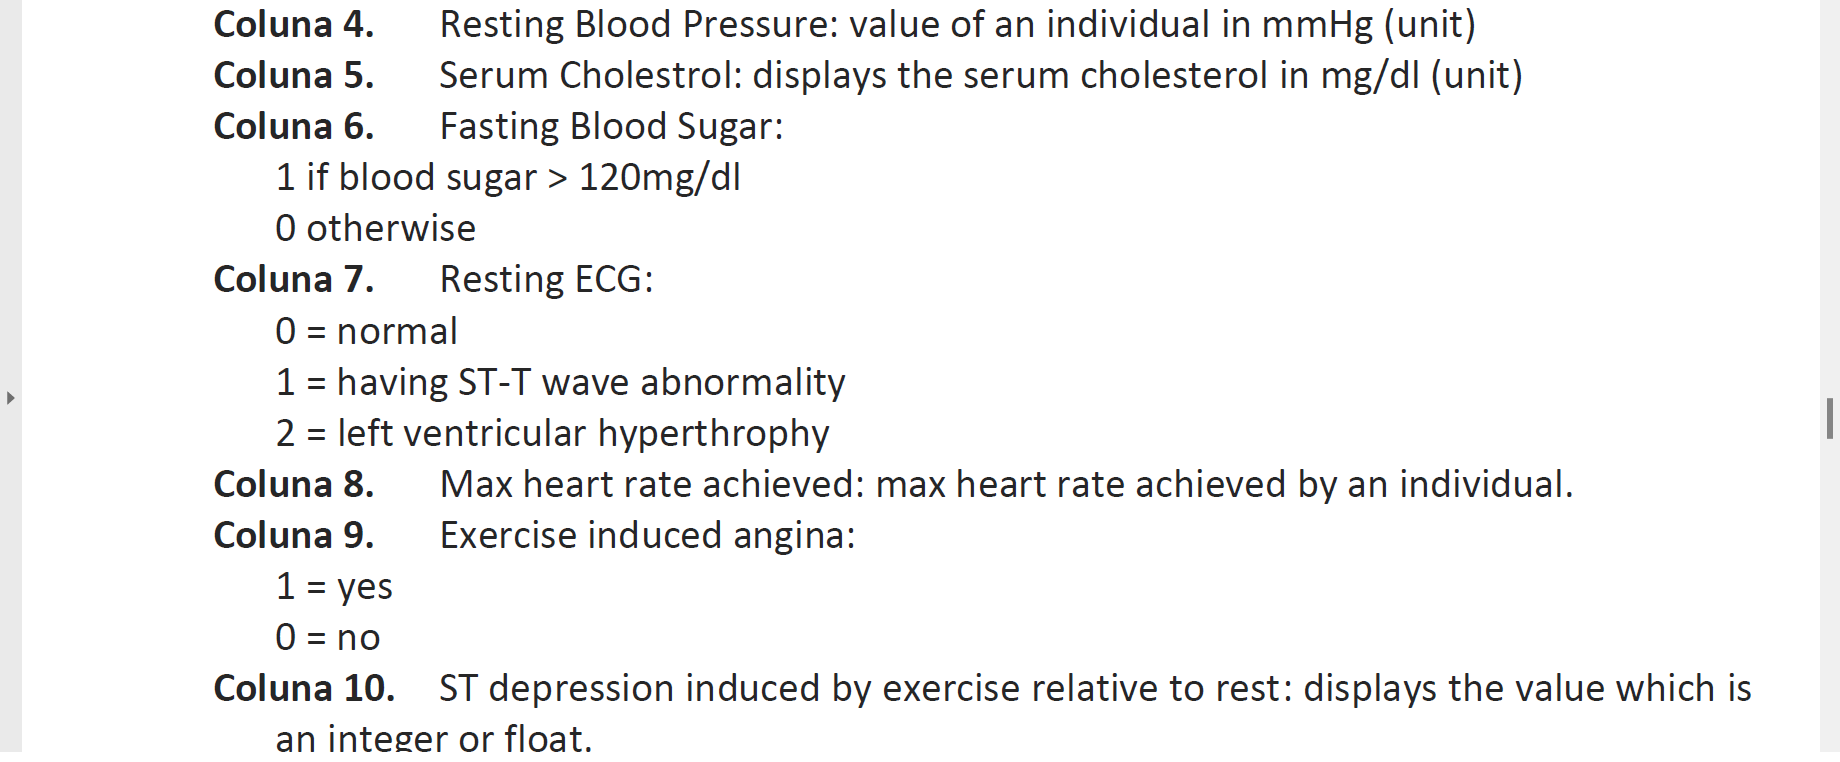

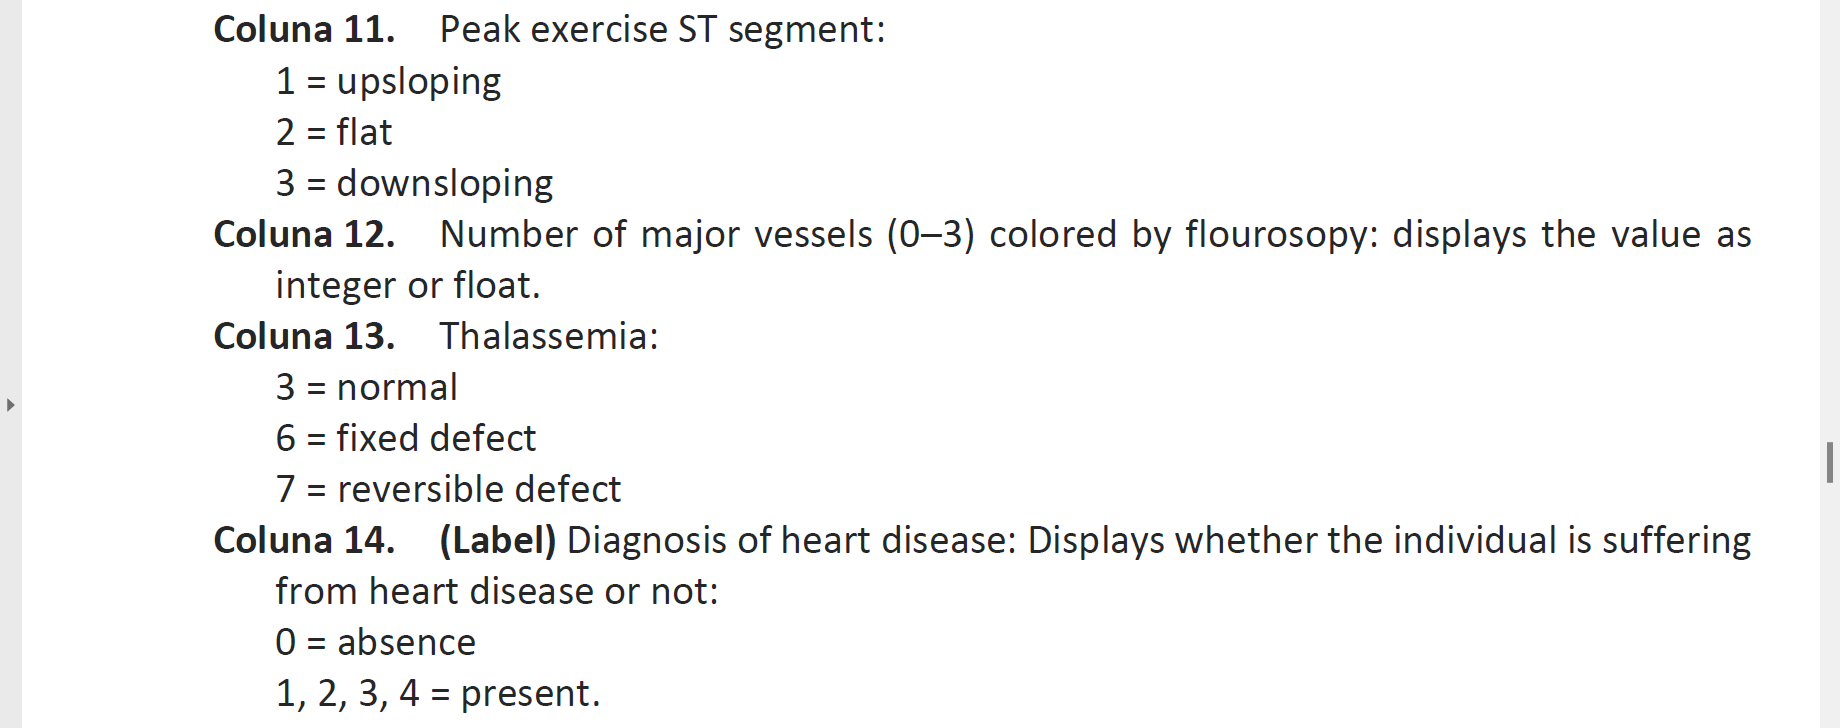

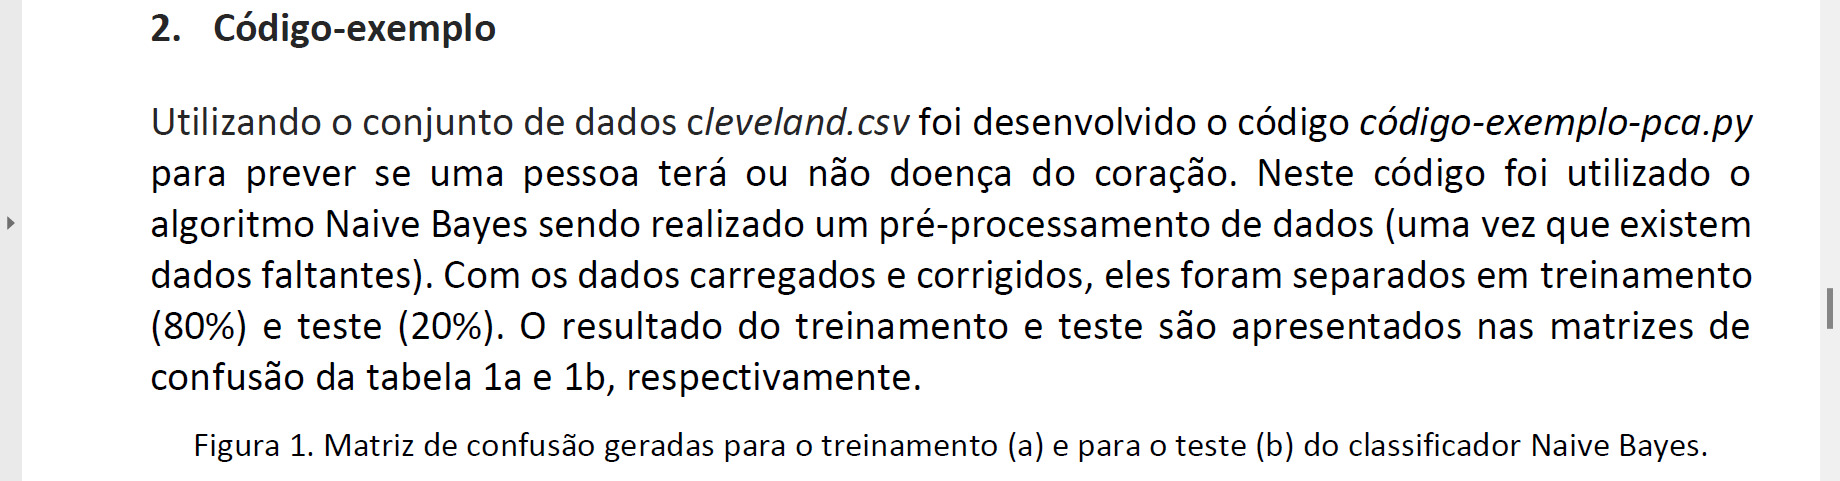

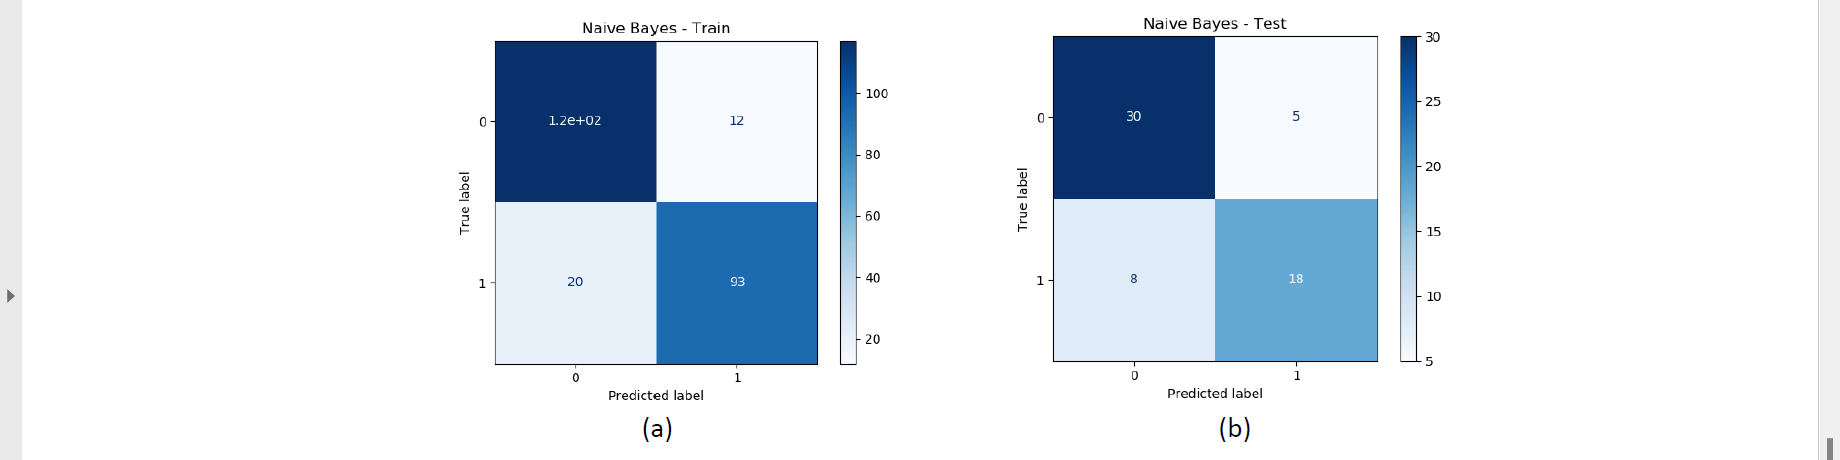

In [ ]:
# cleveland.csv
clev = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-01/cleveland.csv', header = None)
clev.columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

################################## data preprocessing ####################################################

### Mapeia as classes transformando o problema em binário
clev['target'] = clev.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

### Verifica se há valores nulos
print(clev.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64


In [ ]:
### Substitui os valores nulos pela média ##
clev.replace([np.inf, -np.inf], np.nan, inplace=True)
clev.fillna(clev.mean(), inplace=True)
############################################

In [ ]:
print(f"y: {sorted(Counter(clev['target']).items())}")

y: [(0, 164), (1, 139)]


In [ ]:
X = clev.iloc[:, :-1].values
y = clev.iloc[:, -1].values

## Separa os dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

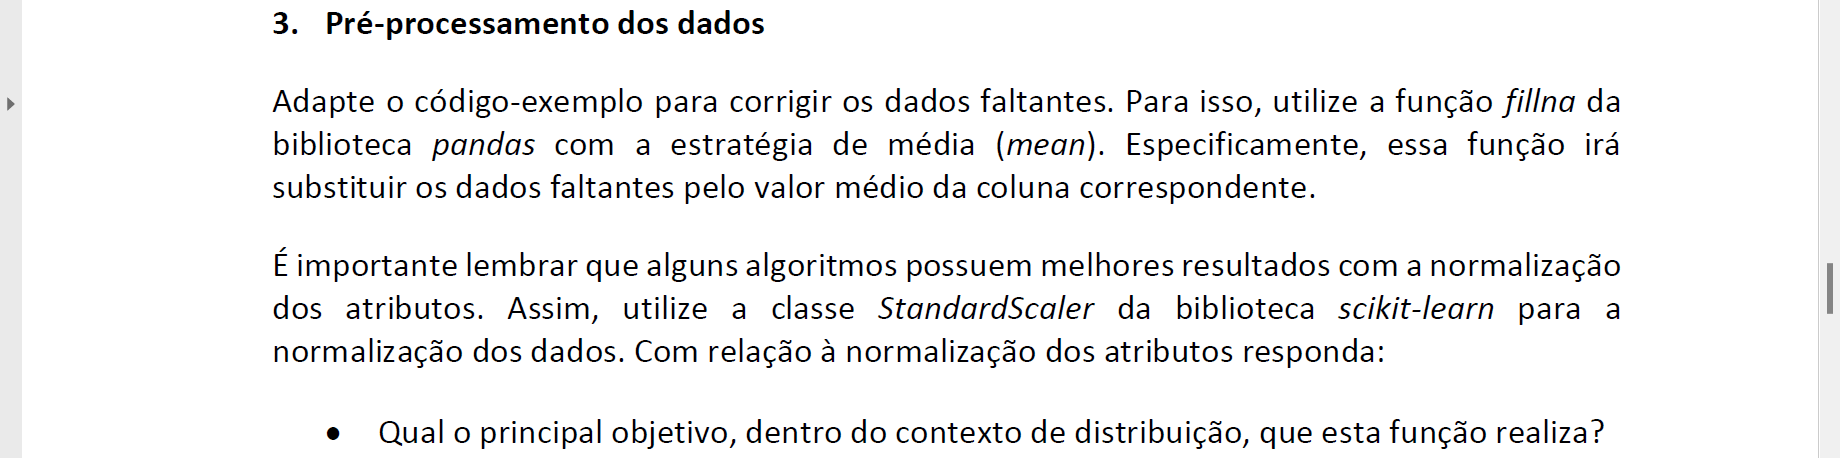

In [ ]:
### Normaliza os dados ###############################
from sklearn.preprocessing import StandardScaler

# Cria uma instância do StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#y_train = scaler.fit_transform(y_train)
#y_test = scaler.fit_transform(y_test)
######################################################

**A classe StandardScaler da biblioteca scikit-learn é utilizada para normalizar um conjunto de dados, com o objetivo de transformar os dados de entrada para que eles possuam uma distribuição normal com média zero e desvio padrão igual a 1. Essa transformação é comum em diversas tarefas de análise de dados, pois muitos algoritmos de aprendizado de máquina e estatística assumem que os dados seguem uma distribuição normal.**

**A normalização dos dados também pode ajudar a evitar problemas relacionados à escala dos dados. Quando as variáveis de entrada possuem escalas muito diferentes, alguns algoritmos podem ter dificuldades em aprender padrões relevantes nos dados. A normalização pode ajudar a minimizar esse problema, permitindo que as variáveis sejam comparáveis em termos de importância para o modelo.**

In [ ]:
### Aplica PCA #######################################
from sklearn.decomposition import PCA
# Cria o classificador PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
######################################################

[[29  6]
 [ 9 17]]
[[29  6]
 [ 9 17]]


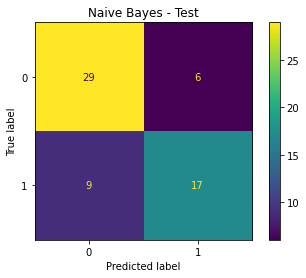

[[116  13]
 [ 26  87]]
[[116  13]
 [ 26  87]]


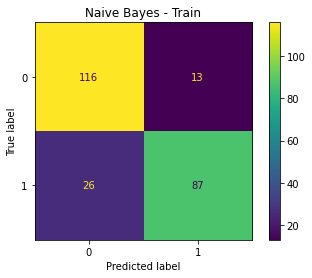


Accuracy for training set for Naive Bayes = 0.8388429752066116
Accuracy for test set for Naive Bayes = 0.7540983606557377


In [ ]:
#########################################   Naive Bayes  #############################################################

# Treinamento Modelo
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train_pca, y_train)

# Teste modelo
y_pred = classifier.predict(X_test_pca)

# Resultados
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm_test = confusion_matrix(y_test, y_pred, labels=classifier.classes_)
print(cm_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

disp.ax_.set_title('Naive Bayes - Test')
print(disp.confusion_matrix)
plt.show()

y_pred_train = classifier.predict(X_train_pca)
cm_train = confusion_matrix(y_train, y_pred_train, labels=classifier.classes_)
print(cm_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=classifier.classes_)
disp.plot()
disp.ax_.set_title('Naive Bayes - Train')
print(disp.confusion_matrix)
plt.show()

print()
print('Accuracy for training set for Naive Bayes = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

[[28  7]
 [ 8 18]]
[[28  7]
 [ 8 18]]


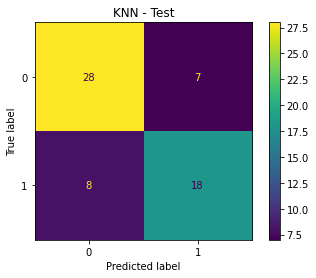

[[114  15]
 [ 20  93]]
[[114  15]
 [ 20  93]]


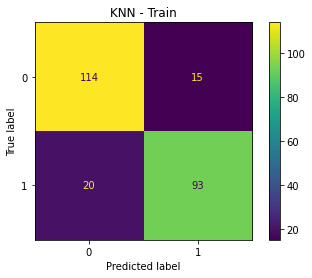


Accuracy for training set for KNN = 0.8553719008264463
Accuracy for test set for KNN = 0.7540983606557377


In [ ]:
#########################################   kNN  #############################################################

# Treinamento Modelo

# Cria o classificador k-NN
knn = KNeighborsClassifier()

# Treina o classificador k-NN nos dados de treino reduzidos por PCA
knn.fit(X_train_pca, y_train)

# Teste modelo
y_pred_knn = knn.predict(X_test_pca)

# Resultados
cm_test = confusion_matrix(y_test, y_pred_knn, labels=knn.classes_)
print(cm_test)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=knn.classes_)
disp.plot()

disp.ax_.set_title('KNN - Test')
print(disp.confusion_matrix)
plt.show()

y_pred_train_knn = knn.predict(X_train_pca)
cm_train = confusion_matrix(y_train, y_pred_train_knn, labels=knn.classes_)
print(cm_train)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=knn.classes_)
disp.plot()
disp.ax_.set_title('KNN - Train')
print(disp.confusion_matrix)
plt.show()

print()
print('Accuracy for training set for KNN = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for KNN = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))

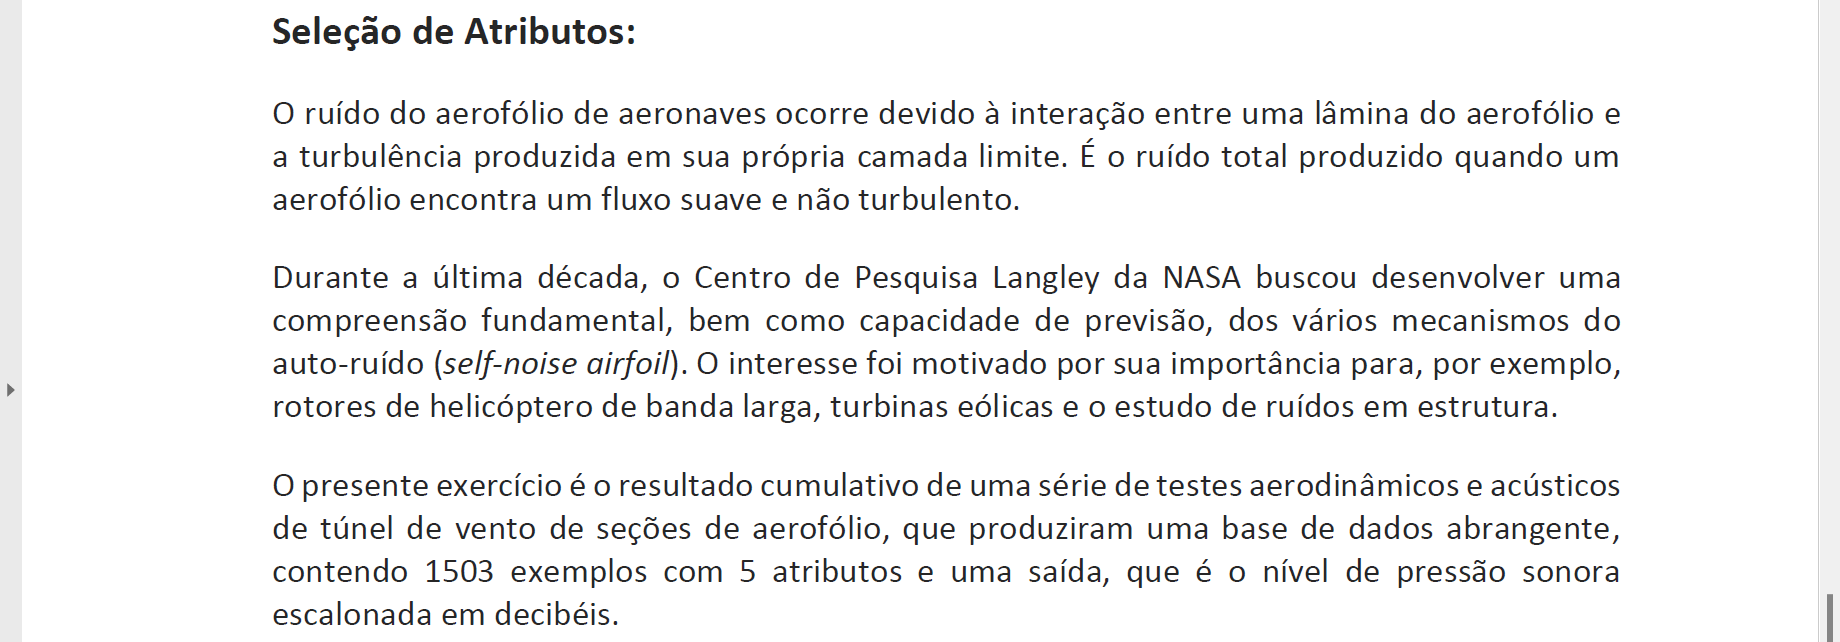

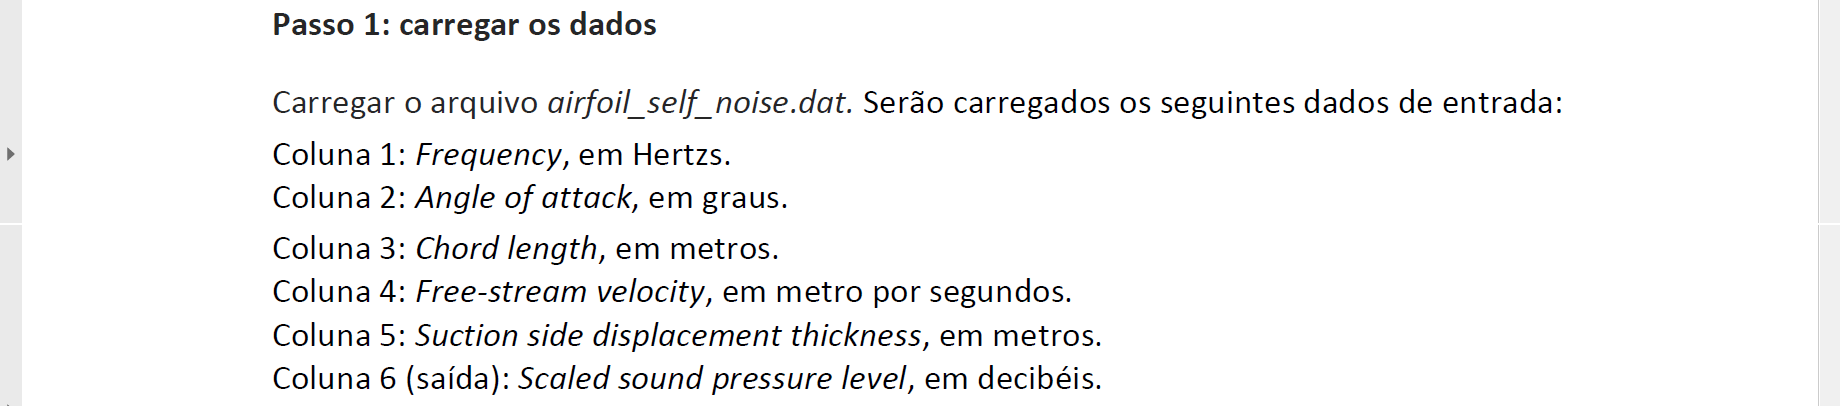

In [ ]:
# airfoil_self_noise.dat
# Carrega o arquivo de dados em um dataframe
air = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Reconhecimentos Padrões/Lista-01/airfoil_self_noise.dat', sep='\t', names=['frequency', 'angle_of_attack', 'chord_length', 'free_stream_velocity', 'suction_thickness', 'sound_pressure_level'])
air.head(5)

,frequency,angle_of_attack,chord_length,free_stream_velocity,suction_thickness,sound_pressure_level
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


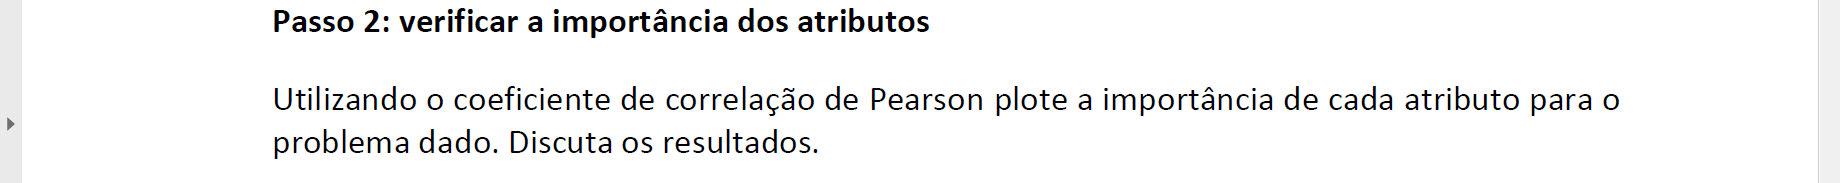

In [ ]:
# Calcula o coeficiente de correlação de Pearson entre cada par de atributos
corr_matrix = air.corr(method='pearson')

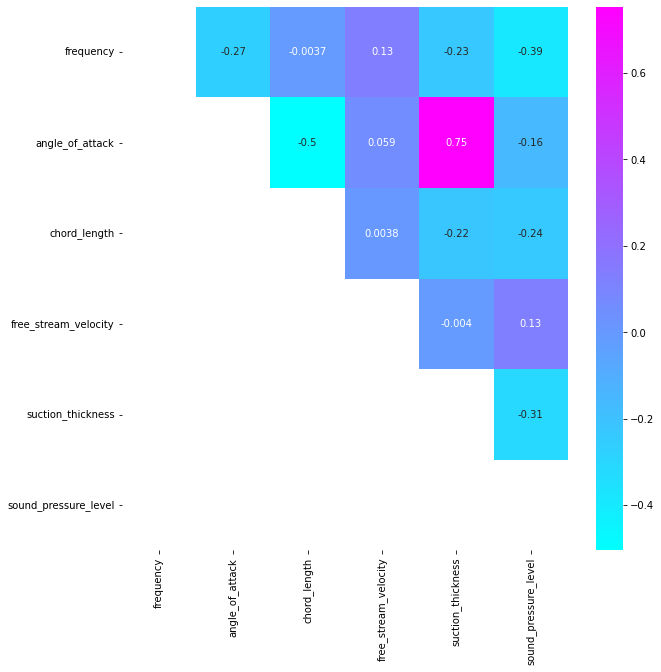

In [ ]:
air_corr = air.corr()
air_mask = np.tril(air_corr)
sns.heatmap(air_corr, fmt='.2g', annot = True, cmap= 'cool', mask=air_mask)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

In [ ]:
#########################################   Decision Tree  #############################################################
from sklearn.tree import DecisionTreeRegressor
# Treinamento Modelo

# Separa os dados em features e target
X_air_tree = air.drop('sound_pressure_level', axis=1)
y_air_tree = air['sound_pressure_level']

# Divide os dados em conjuntos de treinamento e teste
X_air_tree_train, X_air_tree_test, y_air_tree_train, y_air_tree_test = train_test_split(X_air_tree, y_air_tree, test_size=0.2, random_state=42)

# Treina um modelo de Árvore de Decisão com profundidade máxima 4
model_air_tree = DecisionTreeRegressor(max_depth=4, random_state=42)
model_air_tree.fit(X_air_tree_train, y_air_tree_train)

DecisionTreeRegressor(max_depth=4, random_state=42)

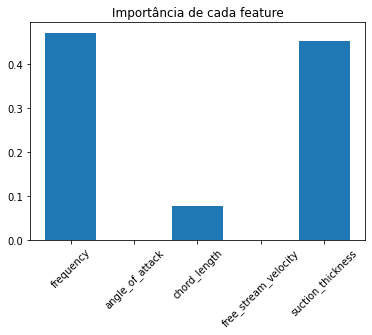

In [ ]:
# Feature Importance
# Obtém a importância de cada feature
importances = model_air_tree.feature_importances_

# Plota um gráfico de barras para visualizar a importância de cada feature
feature_names = X_air_tree.columns
plt.bar(feature_names, importances)
plt.xticks(rotation=45)
plt.title('Importância de cada feature')
plt.show()

**De acordo com o grafico de importancia de cada feature as angle_of_attack e free_stream_veiocity tem baixa importancia, isso também pode ser constatado na matrix de correlação, ou seja, quando duas features uma alta correção uma delas tem menor importância.**

In [ ]:
# Teste modelo
y_pred_air_tree = model_air_tree.predict(X_air_tree_test)

In [ ]:
# Resultados

from sklearn.metrics import mean_squared_error

# Calcula o erro médio quadrático do modelo
mse_air_tree = mean_squared_error(y_air_tree_test, y_pred_air_tree)

print("Erro médio quadrático: {:.2f}".format(mse_air_tree))

Erro médio quadrático: 18.94
